In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline  

pd.options.display.max_columns = None
ccms_data = pd.read_excel('/home/sindhuvarun/EELS hackathon/CCMS/Dummy data/Dummy data/DailyProfileData (7).xlsx')

## Approach 1
Calculate the average energy consumption/day of a CCMS unit using 'Cum kVAh' field of dataset.
Check if the per day consumption is less than the (average consumption + buffer) buffer used here is 10. If
it is less, then there is faulty LED.

In [9]:
ccms_kVAh = abs(ccms_data['Cum kVAh'].diff()[1:])
mean_kVAh = ccms_kVAh.mean()
std_kVAh = ccms_kVAh.std()
print("mean kVAh/day:", mean_kVAh)
print("std kVAh/day:", std_kVAh)

51.57060000000001
5.660078198558124


1.7190200000000004

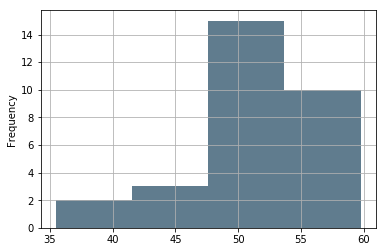

In [25]:
#ccms_kVAh.sort_values
#ccms_kVAh
ccms_kVAh.plot.hist(grid=True, bins=4, color='#607c8e')

In [5]:
ccms_data_test = pd.read_excel('/home/sindhuvarun/EELS hackathon/CCMS/Dummy data/Dummy data/DailyProfileData (7)-Test.xlsx')
abs(ccms_data_test['Cum kVAh'].diff()[1:]) < (mean_kVAh - 2*std_kVAh)

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
Name: Cum kVAh, dtype: bool

In [ ]:
no_of_streetlights = 30

#consumption_per_streetlight per day
consumption_per_streetlight = mean_kVAh/no_of_streetlights


### We can use this consumption_per_streetlight and predict the number of faulty streetlights

## Approach 2
Compute VAR component using diff of 'Cum kwh' and 'Cum kVAh'.
Calculate the mean and std of this diff.
The difference between the two should not be more than mean + 2(std)

This way we are able to pin-point that VAR component is going higher than the non-VAR component

In [27]:
ccms_VAR = abs((ccms_data['Cum kwh'] - ccms_data['Cum kVAh']))
mean_VAR = ccms_VAR.mean()
std_VAR = ccms_VAR.std()
print(mean_VAR)
print(std_VAR)

37.923354838709585
2.9388433614647664


In [28]:
ccms_data_test2 = pd.read_excel('/home/sindhuvarun/EELS hackathon/CCMS/Dummy data/Dummy data/DailyProfileData (7)-Test2.xlsx')
abs((ccms_data_test2['Cum kwh'] - ccms_data_test2['Cum kVAh'])) > (mean_VAR + 2*std_VAR)

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
dtype: bool